In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

pd.set_option('display.width', 1000) #Extend the width of plot
# Doc: https://www.kaggle.com/datasets/arnabbiswas1/microsoft-azure-predictive-maintenance/data

In [69]:
print('\n Telemetry data \n')
df_tele = pd.read_csv('PdM_Telemetry.csv')
print(df_tele.head())
print(df_tele.describe())

'''
Telemetry Time Series Data (PdM_telemetry.csv): It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.
'''




 Telemetry data 

              datetime  machineID        volt      rotate    pressure  vibration
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935  45.087686
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525  43.413973
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905  34.178847
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561  41.122144
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648  25.990511
           machineID           volt         rotate       pressure      vibration
count  876100.000000  876100.000000  876100.000000  876100.000000  876100.000000
mean       50.500000     170.777736     446.605119     100.858668      40.385007
std        28.866087      15.509114      52.673886      11.048679       5.370361
min         1.000000      97.333604     138.432075      51.237106      14.877054
25%        25.750000     160.304927     412.305714      93.498181      36.777299
50%      

'\nTelemetry Time Series Data (PdM_telemetry.csv): It consists of hourly average of voltage, rotation, pressure, vibration collected from 100 machines for the year 2015.\n'

In [83]:
print('\n Error data \n')
df_error = pd.read_csv('PdM_Errors.csv')
print(df_error.head())
print(df_error.describe())

''' 
Error (PdM_errors.csv): These are errors encountered by the machines while in operating condition. 
Since, these errors don't shut down the machines, these are not considered as failures. 
The error date and times are rounded to the closest hour since the telemetry data is collected at an hourly rate.
'''

# Let's do one hot encoding and sum per Datetime and MachineID to avoid duplicates 
df_error = pd.get_dummies(df_error, columns=['errorID'], prefix='errorID', dtype=int)
df_error = df_error.groupby(['datetime', 'machineID']).sum().reset_index()


 Error data 

              datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5
3  2015-01-10 15:00:00          1  error4
4  2015-01-22 10:00:00          1  error4
         machineID
count  3919.000000
mean     51.044654
std      28.954988
min       1.000000
25%      25.000000
50%      51.000000
75%      77.000000
max     100.000000
              datetime  machineID  errorID_error1  errorID_error2  errorID_error3  errorID_error4  errorID_error5
0  2015-01-01 06:00:00         24               1               0               0               0               0
1  2015-01-01 06:00:00         73               0               0               0               1               0
2  2015-01-01 06:00:00         81               1               0               0               0               0
3  2015-01-01 07:00:00         43               0               0               1               0         

In [31]:
print('\n Machine data \n')
df_machines = pd.read_csv('PdM_Machines.csv')
print(df_machines.head())
print(df_machines.describe())

'''
Metadata of Machines (PdM_Machines.csv): Model type & age of the Machines.
'''



 Machine data 

   machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2
        machineID         age
count  100.000000  100.000000
mean    50.500000   11.330000
std     29.011492    5.856974
min      1.000000    0.000000
25%     25.750000    6.750000
50%     50.500000   12.000000
75%     75.250000   16.000000
max    100.000000   20.000000


'\nMetadata of Machines (PdM_Machines.csv): Model type & age of the Machines.\n'

In [79]:
df_maint = pd.read_csv('PdM_Maint.csv')
print(df_maint.head())
print(df_maint.describe())

'''
Maintenance (PdM_maint.csv): If a component of a machine is replaced, that is captured as a record in this table. Components are replaced under two situations: 1. During the regular scheduled visit, the technician replaced it (Proactive Maintenance) 2. A component breaks down and then the technician does an unscheduled maintenance to replace the component (Reactive Maintenance). This is considered as a failure and corresponding data is captured under Failures. Maintenance data has both 2014 and 2015 records. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.
Comp stands for "components" ie the component that got replaced
'''

# Let's do one hot encoding and sum per Datetime and MachineID to avoid duplicates 
df_maint = pd.get_dummies(df_maint, columns=['comp'], prefix='comp', dtype=int)
df_maint = df_maint.groupby(['datetime', 'machineID']).sum().reset_index()

              datetime  machineID   comp
0  2014-06-01 06:00:00          1  comp2
1  2014-07-16 06:00:00          1  comp4
2  2014-07-31 06:00:00          1  comp3
3  2014-12-13 06:00:00          1  comp1
4  2015-01-05 06:00:00          1  comp4
         machineID
count  3286.000000
mean     50.284236
std      28.914478
min       1.000000
25%      25.250000
50%      50.000000
75%      75.000000
max     100.000000
3286
2528
              datetime  machineID  comp_comp1  comp_comp2  comp_comp3  comp_comp4
0  2014-06-01 06:00:00          1           0           1           0           0
1  2014-06-01 06:00:00          6           0           1           0           0
2  2014-06-01 06:00:00          9           1           1           0           0
3  2014-06-01 06:00:00         11           0           1           0           0
4  2014-06-01 06:00:00         16           0           0           0           1
         machineID   comp_comp1   comp_comp2   comp_comp3   comp_comp4
count  252

In [84]:
df_fail = pd.read_csv('PdM_failures.csv')
print(df_fail.head())
print(df_fail.describe())

'''
Failures (PdM_failures.csv): Each record represents replacement of a component due to failure. This data is a subset of Maintenance data. This data is rounded to the closest hour since the telemetry data is collected at an hourly rate.
Comp stands for "components" ie the component that got replaced
'''

'''
This is our target for prediction
'''

# Let's do one hot encoding and sum per Datetime and MachineID to avoid duplicates 
df_fail = pd.get_dummies(df_fail, columns=['failure'], prefix='failure', dtype=int)
df_fail = df_fail.groupby(['datetime', 'machineID']).sum().reset_index()

              datetime  machineID failure
0  2015-01-05 06:00:00          1   comp4
1  2015-03-06 06:00:00          1   comp1
2  2015-04-20 06:00:00          1   comp2
3  2015-06-19 06:00:00          1   comp4
4  2015-09-02 06:00:00          1   comp4
        machineID
count  761.000000
mean    51.911958
std     29.515542
min      1.000000
25%     24.000000
50%     51.000000
75%     79.000000
max    100.000000


In [87]:
#Building 1 single dataset with all information
df_tele['datetime'] = pd.to_datetime(df_tele['datetime'])
df_error['datetime'] = pd.to_datetime(df_error['datetime'])
df_fail['datetime'] = pd.to_datetime(df_fail['datetime'])
df_maint['datetime'] = pd.to_datetime(df_maint['datetime'])


df_main = pd.merge(df_tele, df_error, how='left', on=['machineID', 'datetime'])
df_main = pd.merge(df_main, df_fail, how='left', on=['machineID', 'datetime'])
df_main = pd.merge(df_main, df_maint, how='left', on=['machineID', 'datetime'])
df_main = pd.merge(df_main, df_machines, how='left', on=['machineID'])

#Let's add a column called 'failure' if there's any failure
df_main['failure'] = df_main[['failure_comp1', 'failure_comp2', 'failure_comp3', 'failure_comp4']].any(axis=1).astype(int)

print(df_main.head())
print(df_main.describe())
print(df_main.columns)

             datetime  machineID        volt      rotate    pressure  vibration  errorID_error1  errorID_error2  errorID_error3  errorID_error4  ...  failure_comp2  failure_comp3  failure_comp4  comp_comp1  comp_comp2  comp_comp3  comp_comp4   model  age failure
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935  45.087686             NaN             NaN             NaN             NaN  ...            NaN            NaN            NaN         NaN         NaN         NaN         NaN  model3   18       0
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525  43.413973             NaN             NaN             NaN             NaN  ...            NaN            NaN            NaN         NaN         NaN         NaN         NaN  model3   18       0
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905  34.178847             NaN             NaN             NaN             NaN  ...            NaN            NaN            NaN         NaN      

# General thoughts:
* How long before do we want to predict the failure? 1h before? 2h? 24h? etc > would be interesting to study for different windows
* Does having maintenance before failure reduce the risk? What's the average time between maintenance and failure? 

# Basic graphs

## Evolution of Volt per machine

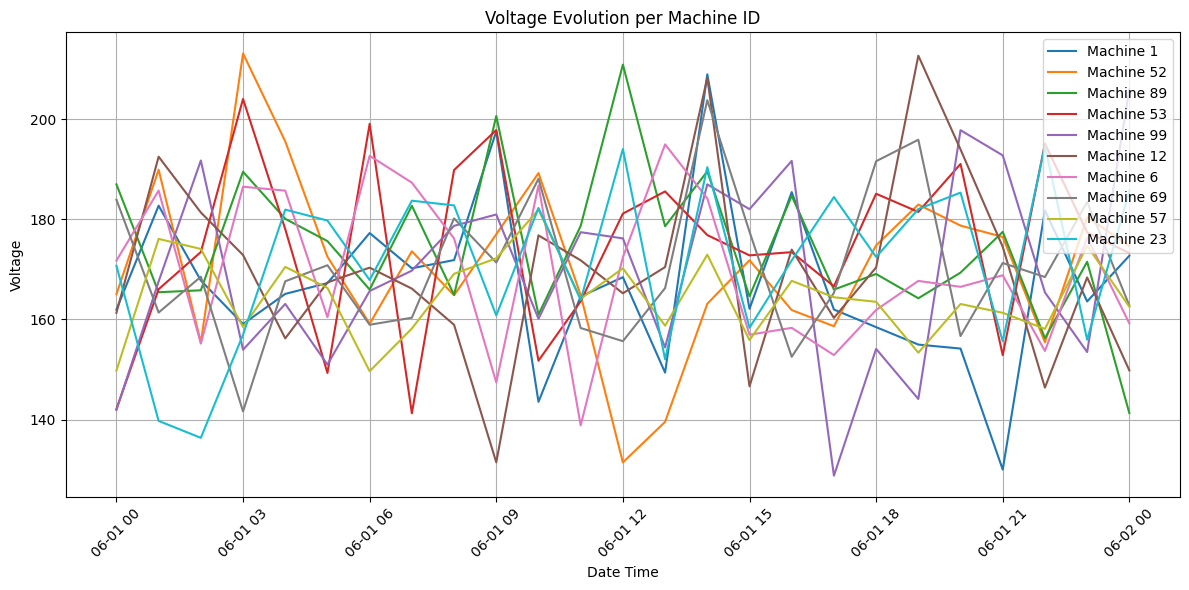

In [49]:
#Plot evolution of volt per Machine for 1 week

# Convert datetime to pandas datetime type if it's not already
df_tele['datetime'] = pd.to_datetime(df_tele['datetime'])
# Sort the dataframe by datetime
df_tele = df_tele.sort_values('datetime')
# Only keep 10 machine IdS
machine_ids = df_tele['machineID'].value_counts().nlargest(10).index

# Create a new figure
plt.figure(figsize=(12, 6))
# Plot voltage for each machine ID
for machine_id in machine_ids:
    data = df_tele[(df_tele['machineID'] == machine_id) & (df_tele['datetime']>='2015-06-01') & (df_tele['datetime']<='2015-06-02')]
    plt.plot(data['datetime'], data['volt'], label=f'Machine {machine_id}')

# Customize the plot
plt.title('Voltage Evolution per Machine ID')
plt.xlabel('Date Time')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Evolution of Volt for 1 machine and red bar if there's a failure

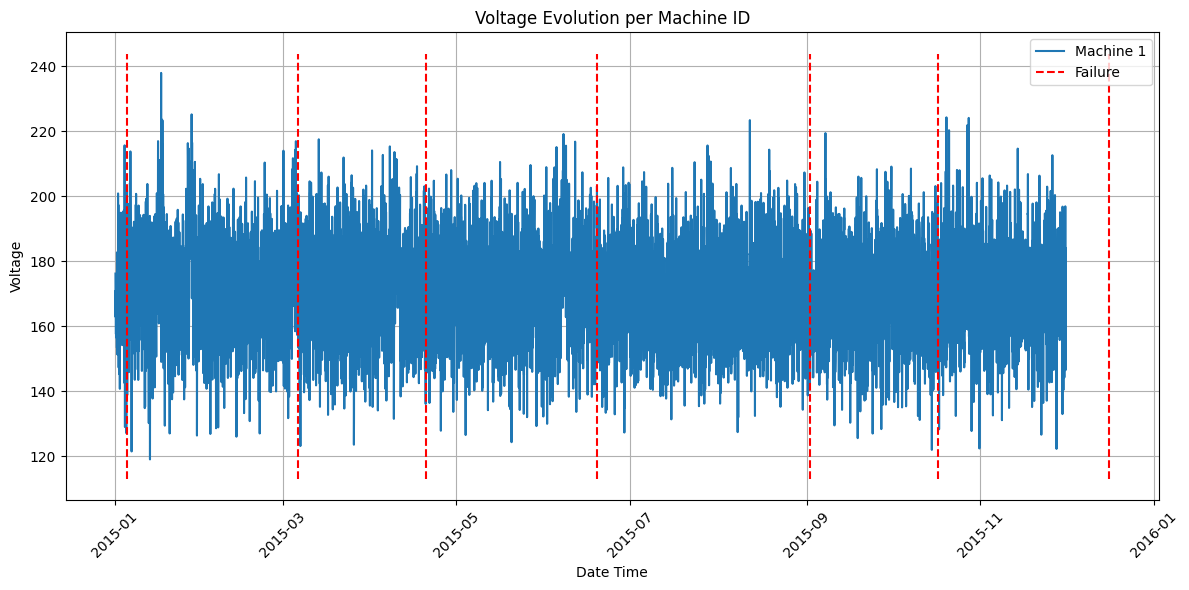

In [93]:
#Plot evolution of volt per Machine for 1 week


# Sort the dataframe by datetime
df_main = df_main.sort_values('datetime')
#Only for 1 machine
machine_ids = [1]
# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot voltage for each machine ID
for machine_id in machine_ids:
    data = df_main[(df_main['machineID'] == machine_id) & (df_main['datetime']>='2015-01-01') & (df_main['datetime']<='2015-12-01')]
    plt.plot(data['datetime'], data['volt'], label=f'Machine {machine_id}')

# Plot red bars for failures
failures = df_main[(df_main['machineID'] == machine_id) & (df_main['failure'] == 1)]
ax.vlines(failures['datetime'], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], 
          colors='red', linestyles='dashed', label='Failure')

# Customize the plot
plt.title('Voltage Evolution per Machine ID')
plt.xlabel('Date Time')
plt.ylabel('Voltage')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()